In [1]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from music21 import *
import time


## Create LandscapeSonifier Class

In [2]:

class LandscapeSonifier:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path)
        self.gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        self.height, self.width = self.gray_image.shape
        self.current_x = 0

    def get_frequencies(self):
        if self.current_x >= self.width:
            return None

        column = self.gray_image[:, self.current_x]
        treble = np.mean(column[:self.height//3])
        mid = np.mean(column[self.height//3:2*self.height//3])
        bass = np.mean(column[2*self.height//3:])

        treble_freq = self.map_to_frequency(treble, 440, 880)
        mid_freq = self.map_to_frequency(mid, 220, 440)
        bass_freq = self.map_to_frequency(bass, 110, 220)

        self.current_x += 1
        return treble_freq, mid_freq, bass_freq

    @staticmethod
    def map_to_frequency(value, min_freq, max_freq):
        return min_freq + (max_freq - min_freq) * (value / 255)

In [3]:
def create_test_image(width, height, color_values):
    """
    Creates a synthetic grayscale image with specific vertical columns.
    """
    image = np.zeros((height, width), dtype=np.uint8)
    for x in range(width):
        image[:, x] = color_values[x] if x < len(color_values) else 0
    return image

In [11]:
# Test 1: Uniform gray image
width, height = 50, 50
uniform_image = create_test_image(width, height, [128] * width)

# Save out image
test_image_path = 'images/uniform_image.png'
cv2.imwrite(test_image_path, uniform_image)

# Init sonifier
sonifier = LandscapeSonifier(test_image_path)

# Get frequencies
for _ in range(width):
    freqs = sonifier.get_frequencies()
    print(f"Frequencies: {freqs}")

Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(660.86274509

In [16]:

# Test 2: Gradient image
gradient_image = np.linspace(0, 255, width, dtype=np.uint8)
gradient_image = np.tile(gradient_image, (height, 1))

# Save out image
test_image_path2 = 'images/gradient_image.png'
cv2.imwrite(test_image_path2, gradient_image)

# Init sonifier
sonifier = LandscapeSonifier(test_image_path2)

# Get frequencies
for _ in range(width):
    freqs = sonifier.get_frequencies()
    print(f"Frequencies: {freqs}")

Frequencies: (np.float64(440.0), np.float64(220.0), np.float64(110.0))
Frequencies: (np.float64(448.62745098039215), np.float64(224.31372549019608), np.float64(112.15686274509804))
Frequencies: (np.float64(457.2549019607843), np.float64(228.62745098039215), np.float64(114.31372549019608))
Frequencies: (np.float64(465.88235294117646), np.float64(232.94117647058823), np.float64(116.47058823529412))
Frequencies: (np.float64(474.5098039215686), np.float64(237.2549019607843), np.float64(118.62745098039215))
Frequencies: (np.float64(484.8627450980392), np.float64(242.4313725490196), np.float64(121.2156862745098))
Frequencies: (np.float64(493.4901960784314), np.float64(246.7450980392157), np.float64(123.37254901960785))
Frequencies: (np.float64(502.11764705882354), np.float64(251.05882352941177), np.float64(125.52941176470588))
Frequencies: (np.float64(510.7450980392157), np.float64(255.37254901960785), np.float64(127.68627450980392))
Frequencies: (np.float64(519.3725490196078), np.float64(25

In [18]:
# Test 3: IMage with columns of different colors
color_values = [0, 64, 128, 192, 255] * (width // 5)
color_image = create_test_image(width, height, color_values)

# Save out image
test_image_path3 = 'images/color_image.png'
cv2.imwrite(test_image_path3, color_image)

# Init sonifier
sonifier = LandscapeSonifier(test_image_path3)

# Get frequencies
for _ in range(width):
    freqs = sonifier.get_frequencies()
    print(f"Frequencies: {freqs}")

Frequencies: (np.float64(440.0), np.float64(220.0), np.float64(110.0))
Frequencies: (np.float64(550.4313725490197), np.float64(275.21568627450984), np.float64(137.60784313725492))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(771.2941176470588), np.float64(385.6470588235294), np.float64(192.8235294117647))
Frequencies: (np.float64(880.0), np.float64(440.0), np.float64(220.0))
Frequencies: (np.float64(440.0), np.float64(220.0), np.float64(110.0))
Frequencies: (np.float64(550.4313725490197), np.float64(275.21568627450984), np.float64(137.60784313725492))
Frequencies: (np.float64(660.8627450980392), np.float64(330.4313725490196), np.float64(165.2156862745098))
Frequencies: (np.float64(771.2941176470588), np.float64(385.6470588235294), np.float64(192.8235294117647))
Frequencies: (np.float64(880.0), np.float64(440.0), np.float64(220.0))
Frequencies: (np.float64(440.0), np.float64(220.0), np.float64(110.0))

In [20]:
def plot_frequencies(frequencies, title="Frequencies over Image Width"):
    """
    Plots the frequencies for each column of the image.
    """
    treble_freqs, mid_freqs, bass_freqs = zip(*frequencies)
    plt.figure(figsize=(12, 6))
    plt.plot(treble_freqs, label='Treble Frequencies', marker='o')
    plt.plot(mid_freqs, label='Mid Frequencies', marker='x')
    plt.plot(bass_freqs, label='Bass Frequencies', marker='^')
    plt.xlabel('Image Column')
    plt.ylabel('Frequency (Hz)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Collect frequencies for plotting
def collect_frequencies(image_path):
    sonifier = LandscapeSonifier(image_path)
    frequencies = []
    while True:
        freqs = sonifier.get_frequencies()
        if freqs is None:
            break
        frequencies.append(freqs)
    return frequencies

In [26]:
from ing_theme_matplotlib import mpl_style
mpl_style(dark=True)

Plotting frequencies for image: images/uniform_image.png


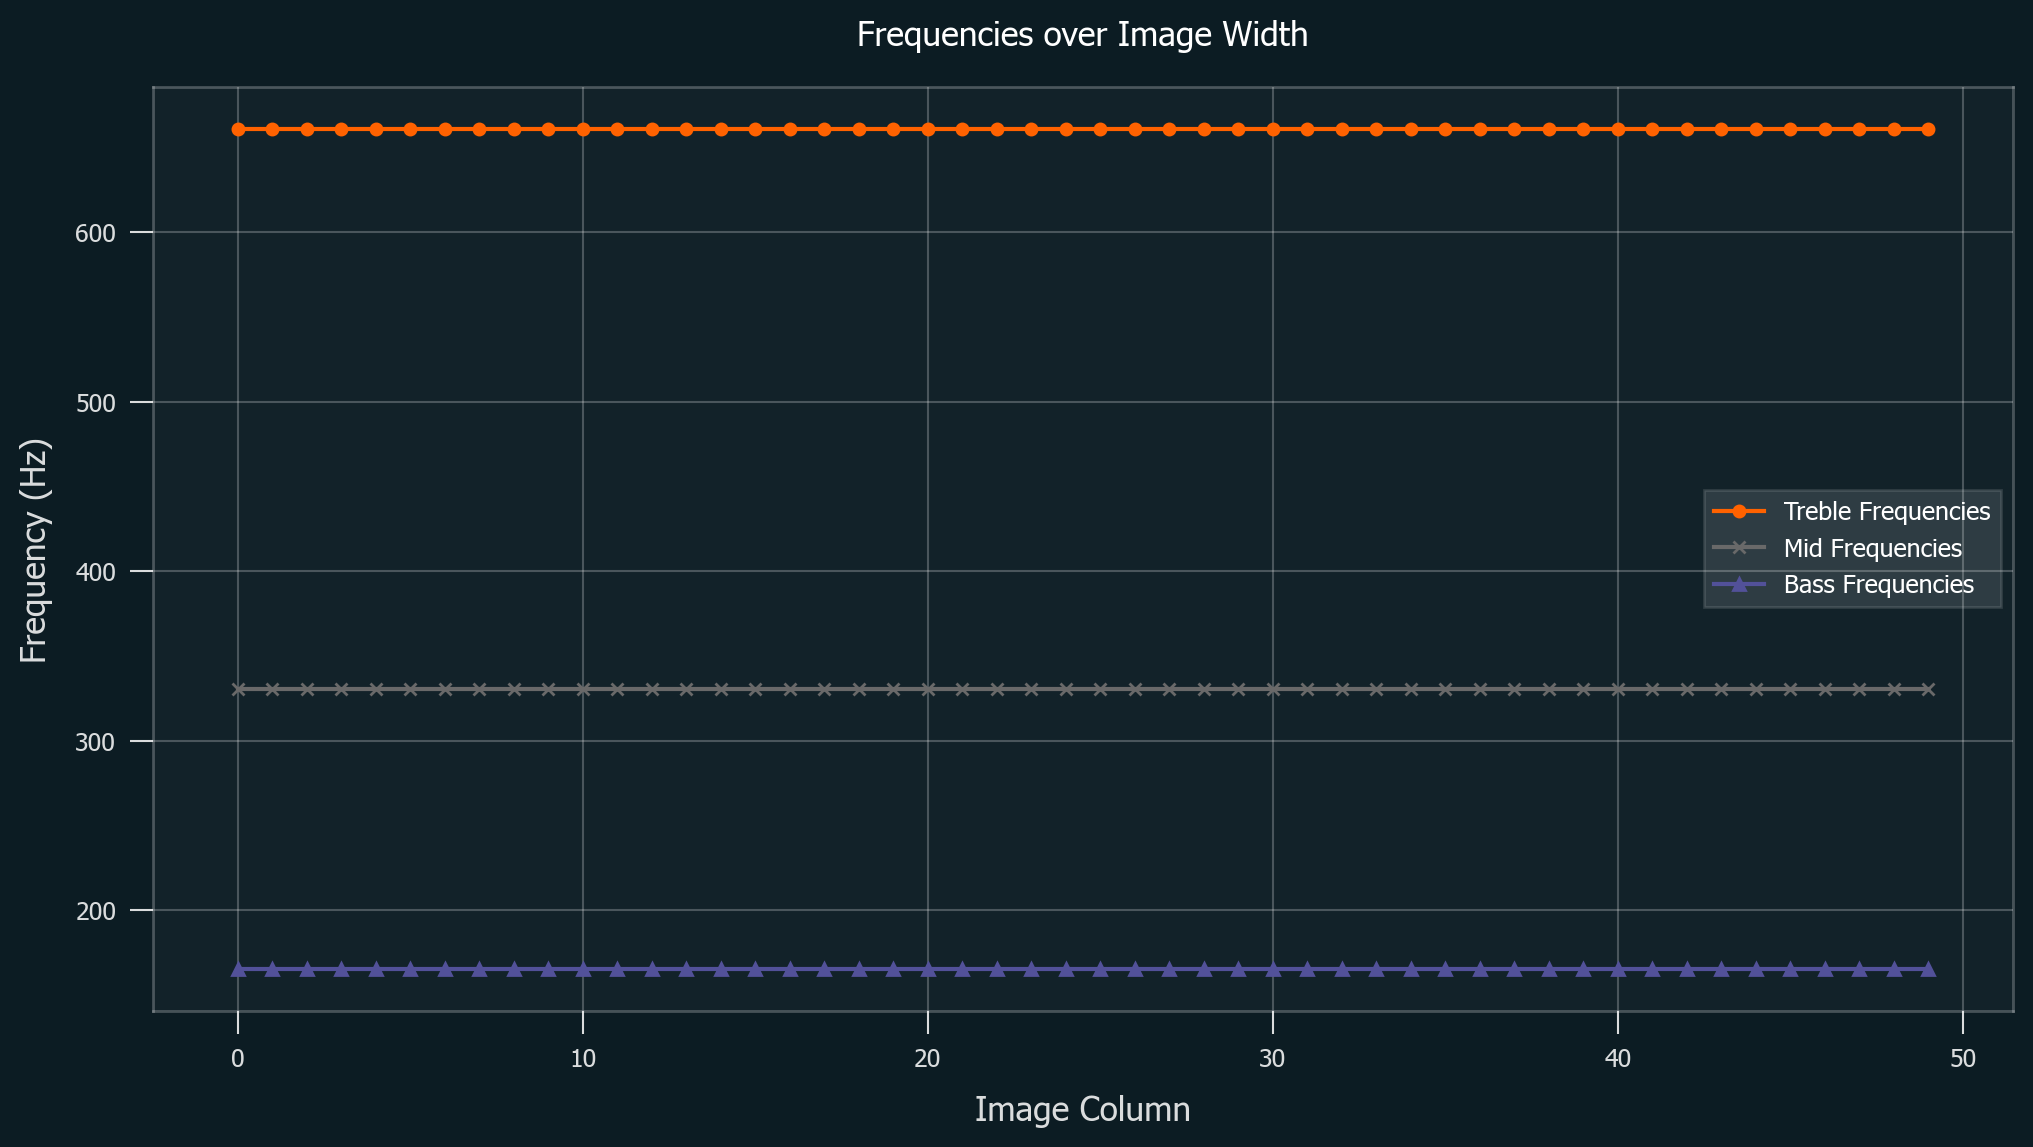

Plotting frequencies for image: images/gradient_image.png


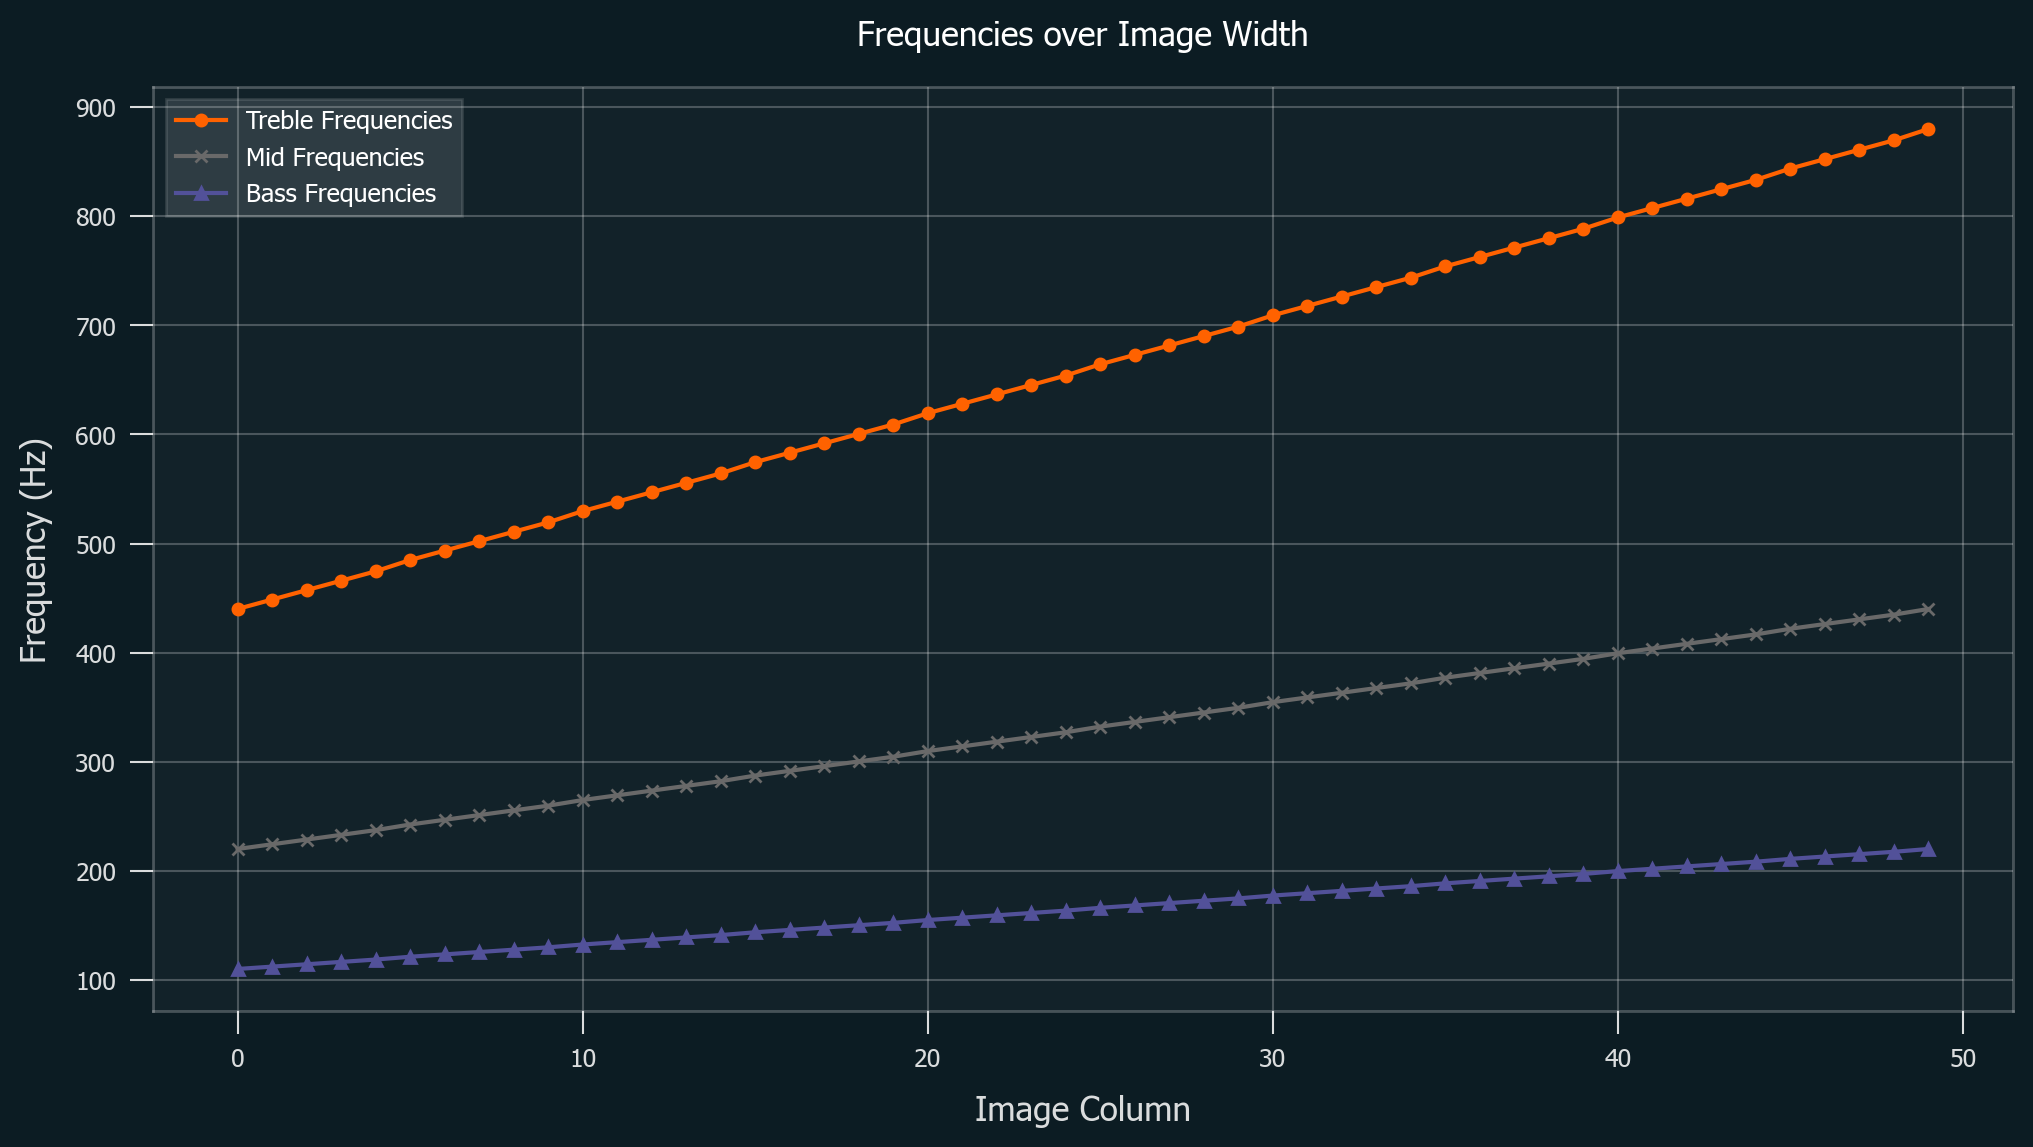

Plotting frequencies for image: images/color_image.png


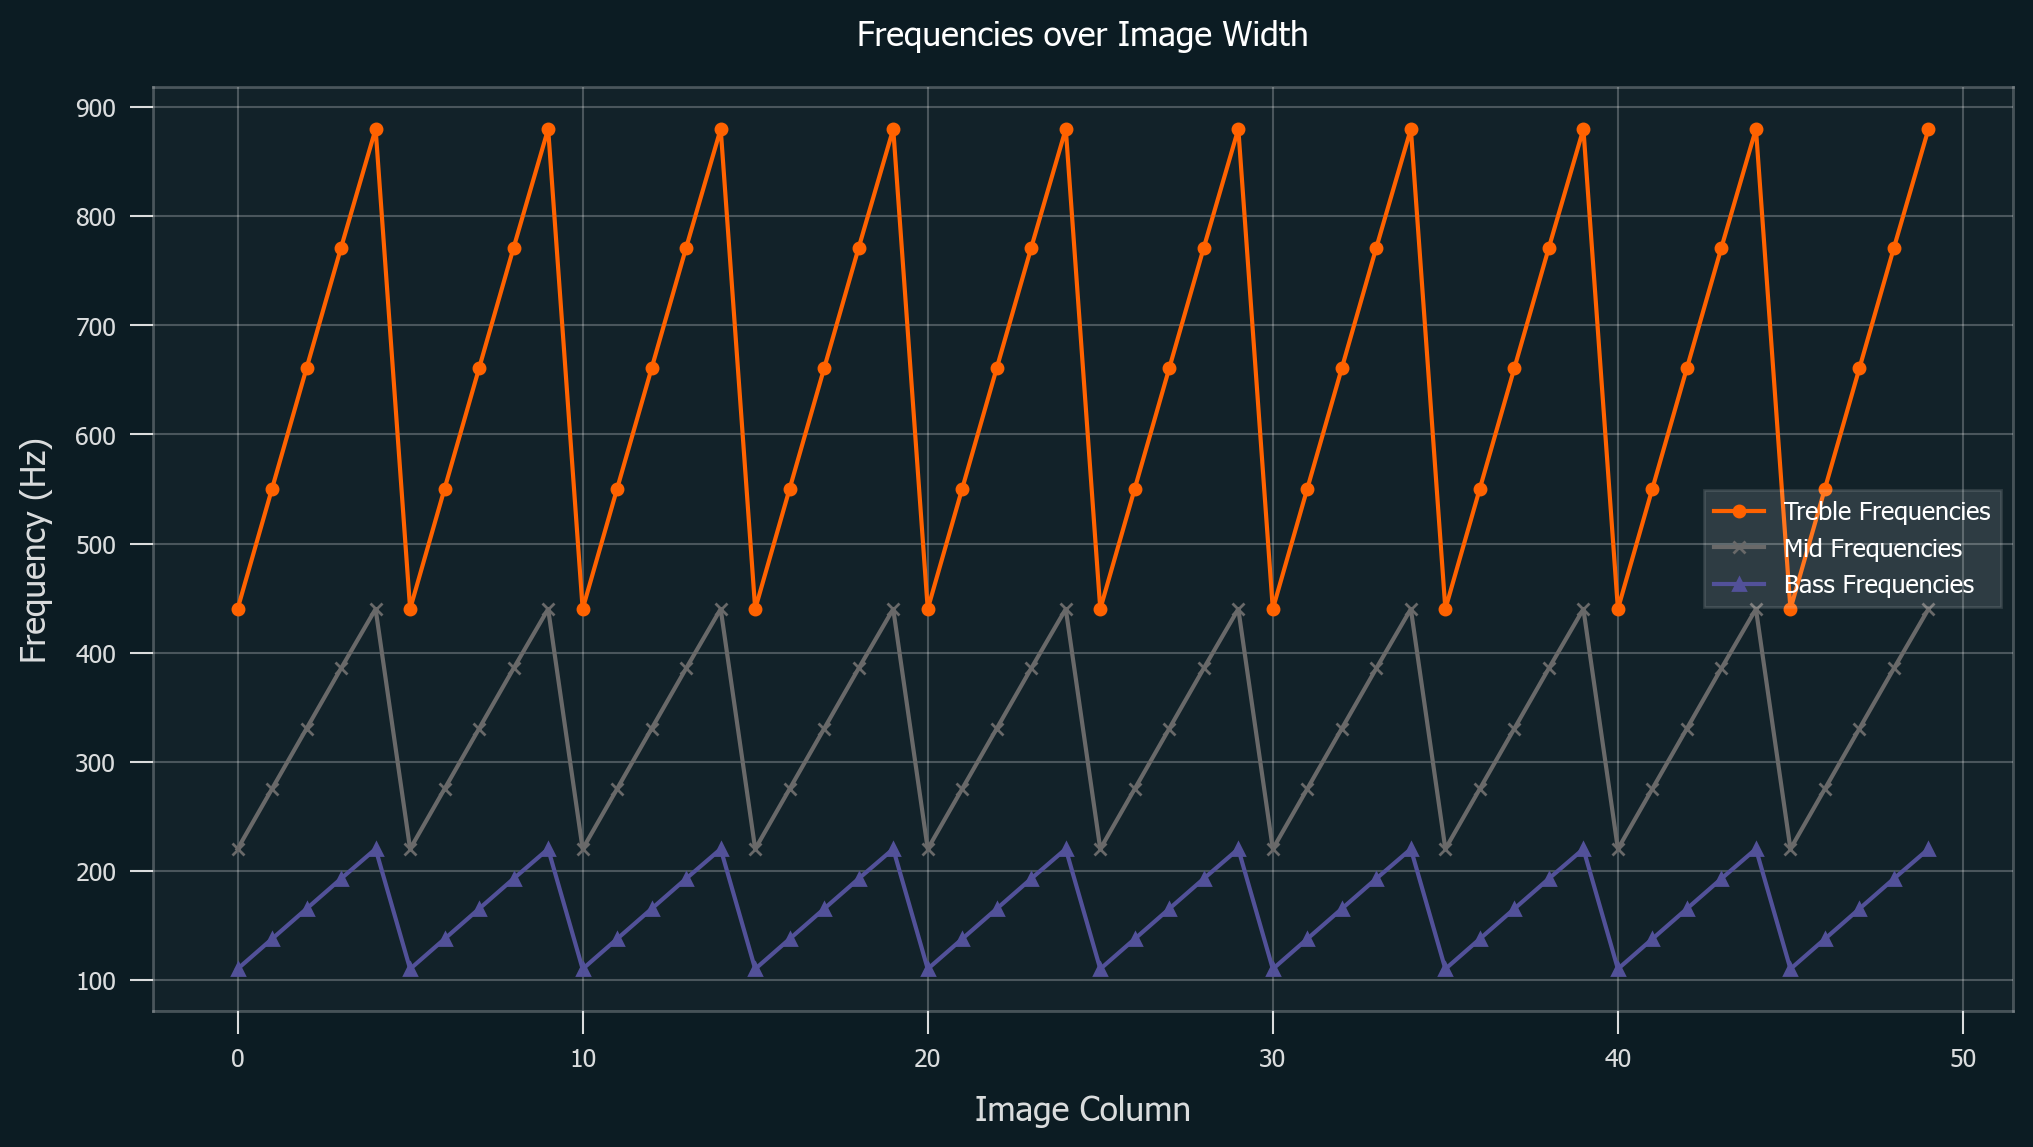

Plotting frequencies for image: images/mountains_1.png


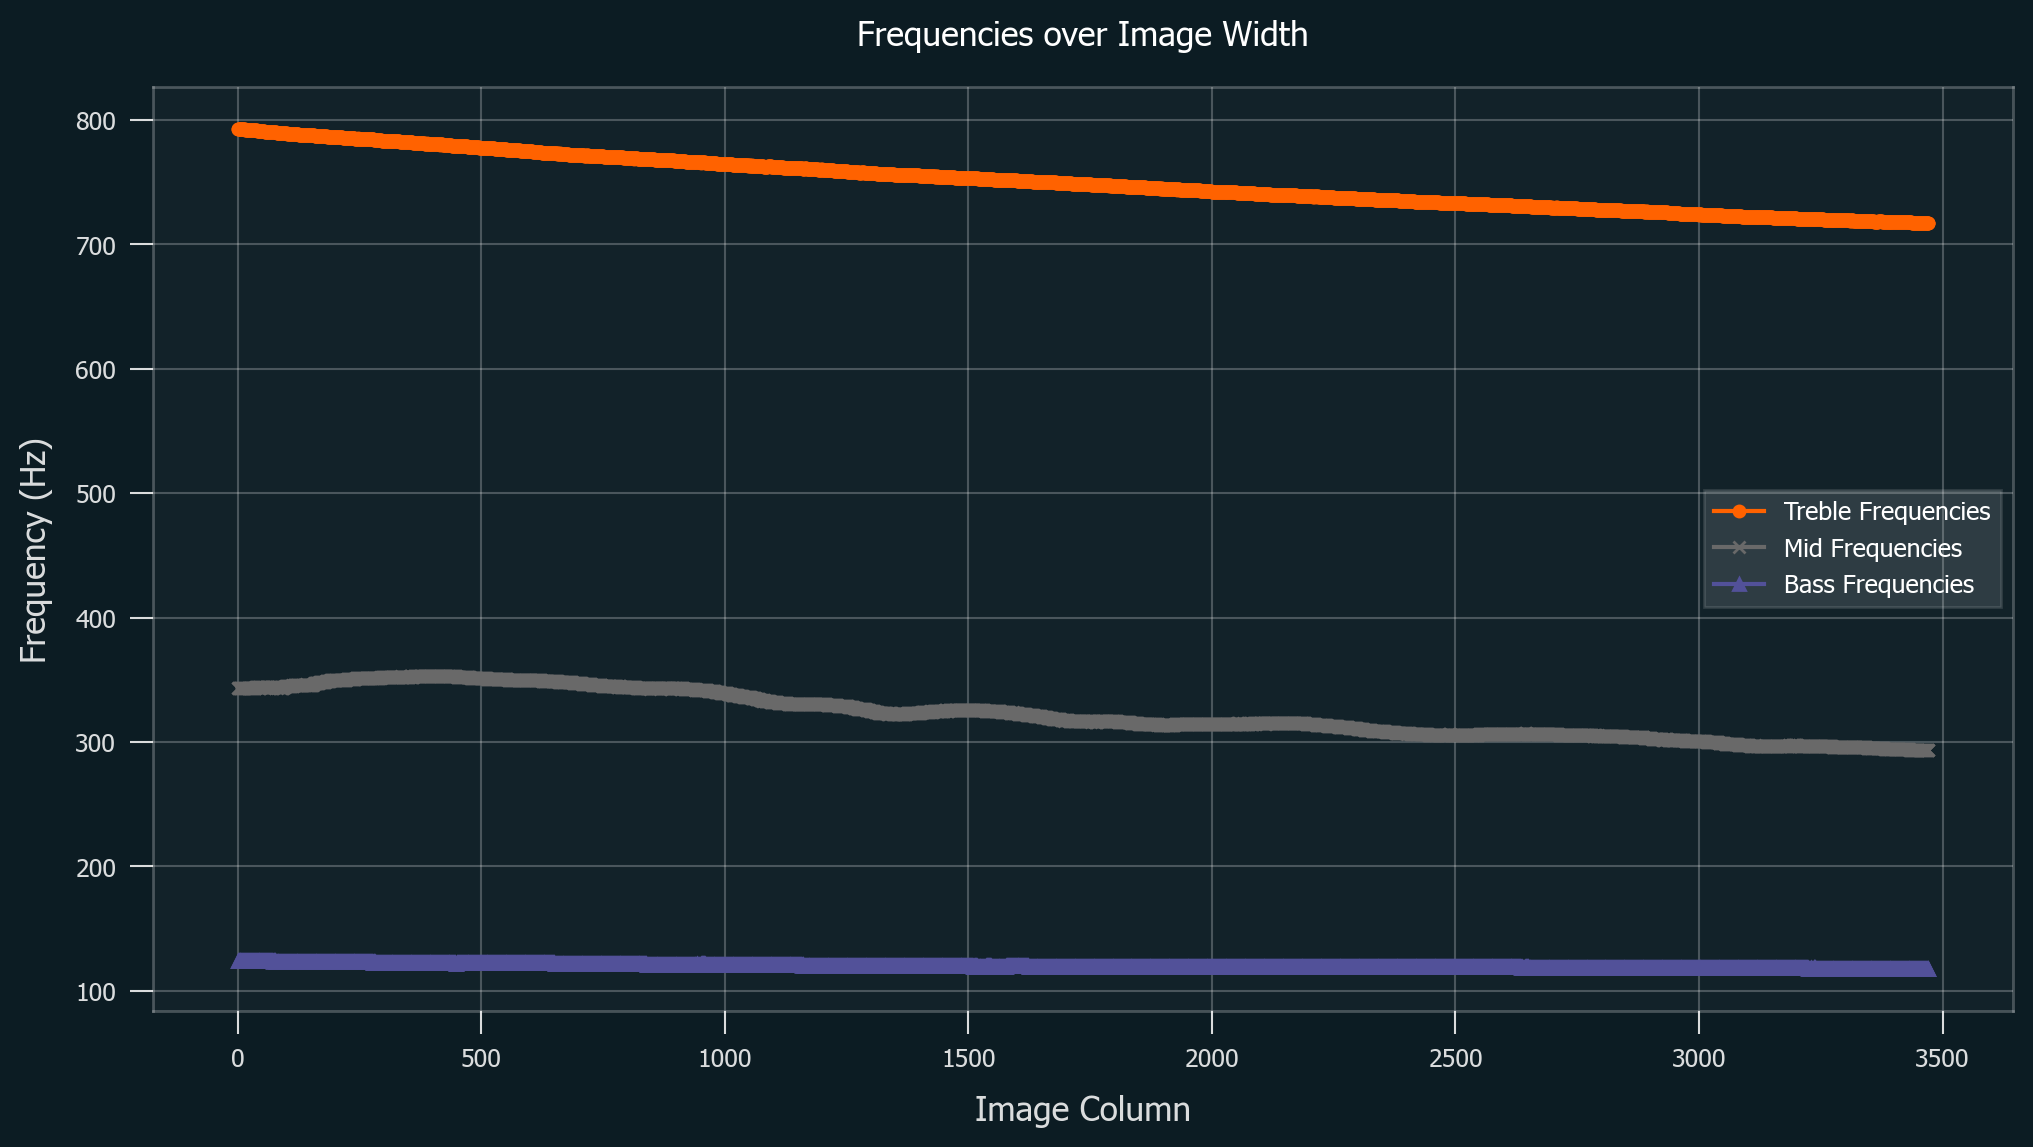

Plotting frequencies for image: images/hazy_fajada_butte.png


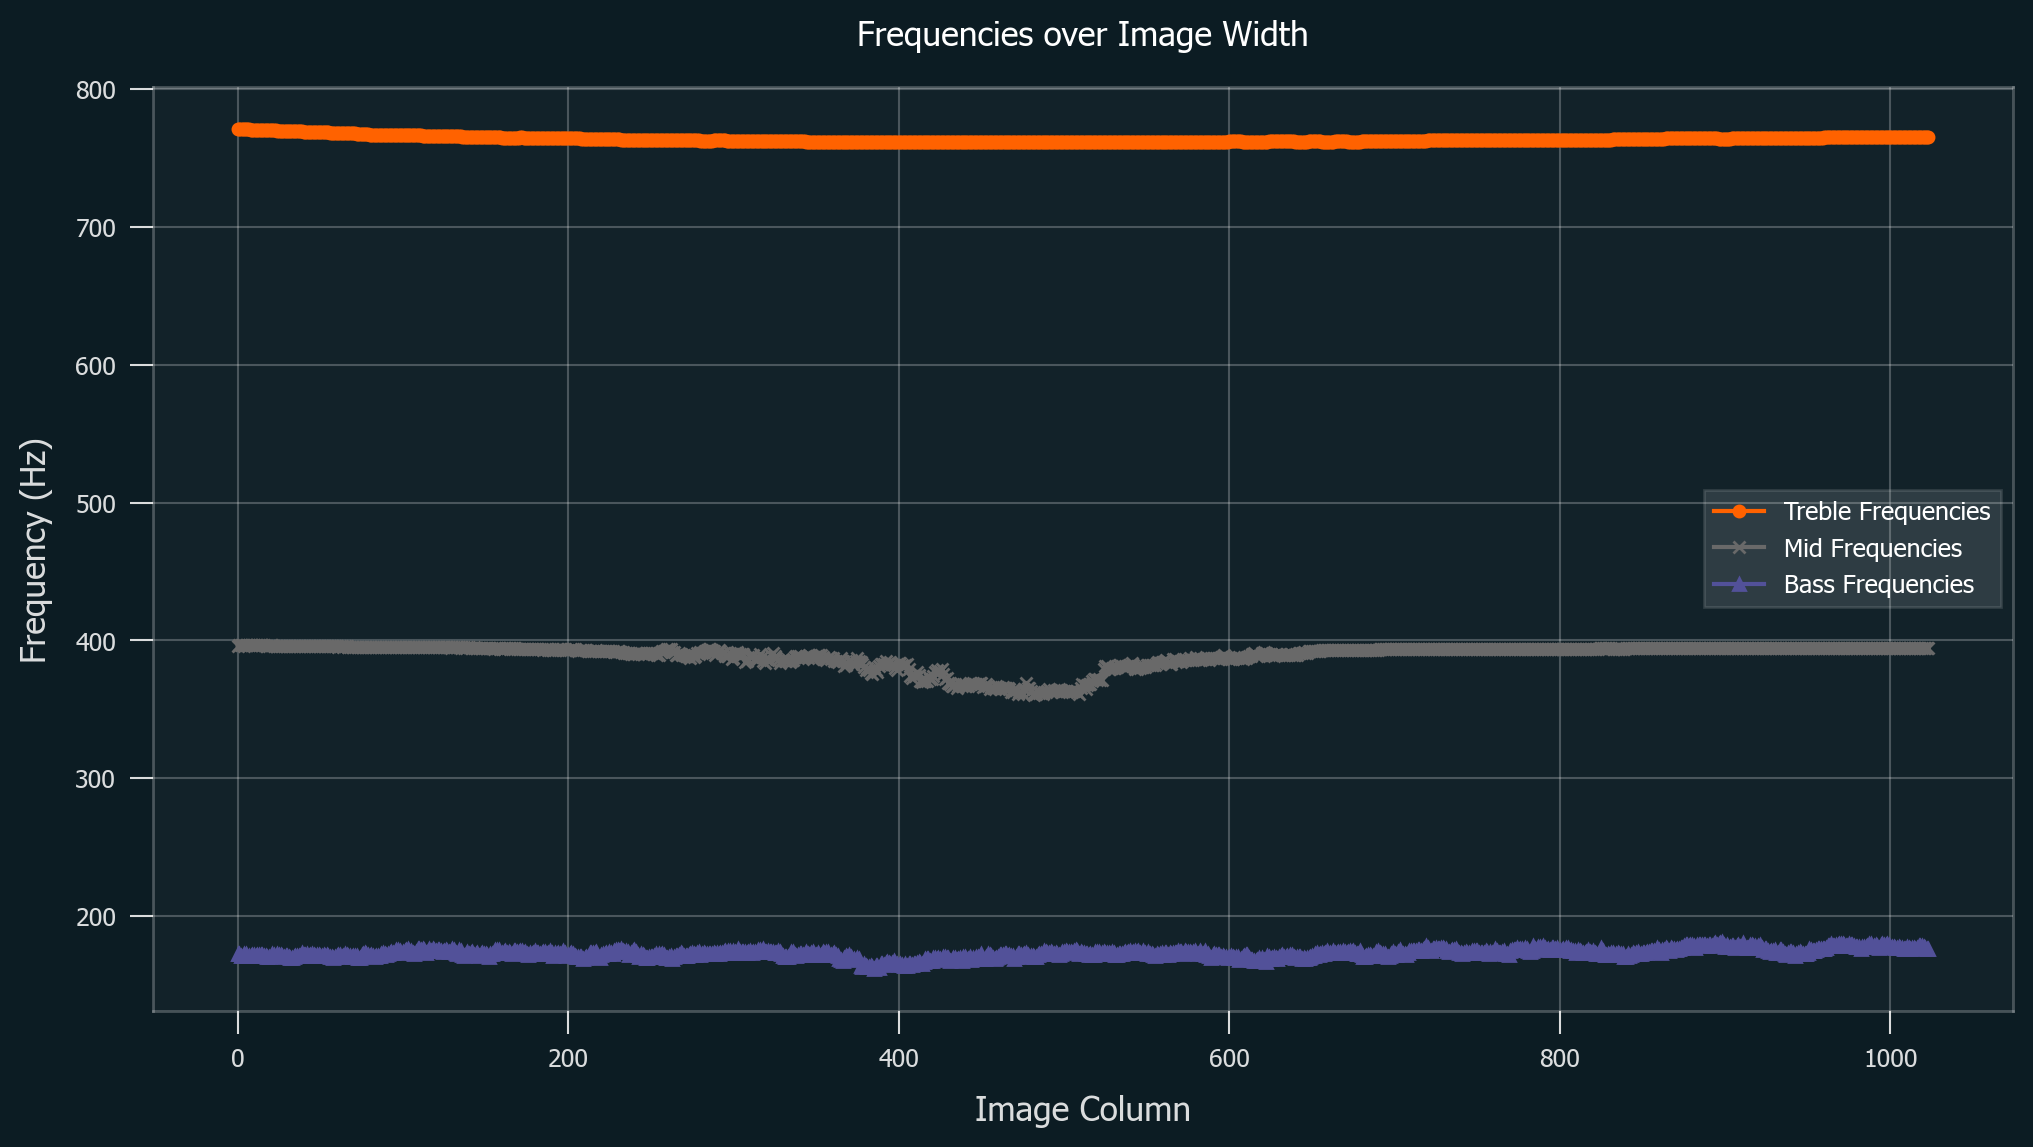

In [29]:
# List of image paths
image_paths = [test_image_path, test_image_path2, test_image_path3, 'images/mountains_1.png', 'images/hazy_fajada_butte.png']


# Plot frequencies for each image
for image_path in image_paths:

    # Collect frequencies
    frequencies = collect_frequencies(image_path)

    # Plot frequencies
    print(f"Plotting frequencies for image: {image_path}")
    plot_frequencies(frequencies)




## Audio Generator Class